In [1]:
# If there's error when importing citipy, please run below commend. 
# pip install citipy

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

43.86554720998319 -131.7673896468715
-25.590226977147623 -111.0773918916972
-26.252508012936275 -18.35229505112133
43.62166600968763 -87.60670836630908
7.010011764767043 -93.27847460807965
-50.909793819248115 80.15398262063331
89.67570583757256 91.09967638253045
80.0742870229627 48.08284093743018
22.74725566046881 -8.658934969357148
77.36546318550828 41.20404596758661
-60.07026939043274 61.50760866108561
33.547197814666276 -74.90678875765138
16.532221732443432 -1.744736070059389
20.169109521976765 -152.70080681598571
31.06095876954923 -108.16241586311523
-48.289538988893725 120.78746222604235
-37.50249838711332 16.15548407948279
-22.297502244324477 146.45086755268778
61.40805553548901 24.330132733141426
17.680956849509684 99.17109407769942
76.75444965053487 137.58637230560436
-70.31125788801755 -85.53377173658107
-43.610627715781604 -72.27075864043358
42.735977573978516 -12.49834548272338
-45.58613848708532 157.6662979002803
-54.89059773606303 -71.60143064374336
72.74877179652145 -71.6

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


north bend us
rikitea pf
jamestown sh
sheboygan us
san jose gt
mahebourg mu
dikson ru
belushya guba ru
taoudenni ml
ostrovnoy ru
taolanaro mg
havelock us
tombouctou ml
hilo us
ascension mx
albany au
cape town za
moranbah au
kangasala fi
thoen th
nizhneyansk ru
punta arenas cl
castro cl
muros es
tuatapere nz
punta arenas cl
clyde river ca
hilo us
qaqortoq gl
catamarca ar
sahrak af
rikitea pf
sept-iles ca
kahului us
camacupa ao
kodiak us
hithadhoo mv
camana pe
namibe ao
lompoc us
vila franca do campo pt
puerto ayora ec
broome au
vaini to
ushuaia ar
rikitea pf
hudson bay ca
bridlington gb
sinkat sd
bethel us
mizdah ly
tuktoyaktuk ca
new norfolk au
qaanaaq gl
longyearbyen sj
karratha au
belushya guba ru
ahipara nz
havoysund no
neftcala az
punta arenas cl
sal rei cv
lagoa pt
tasiilaq gl
salinas ec
kaitangata nz
khatanga ru
torbay ca
mataura pf
amderma ru
sola vu
belushya guba ru
sao filipe cv
chimbote pe
new norfolk au
kavaratti in
bredasdorp za
jamestown sh
tsihombe mg
mehamn no
busselton 

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.    Hiding API key. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an endpoint URL for a city.    Hiding API key.
city_url = url + "&q=" + "Boston"

In [13]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
# Indicating a valid response from the server. 
city_weather.status_code

200

In [15]:
# Create an endpoint URL for a city. #Getting Response 404 means there was an error requesting API. 
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [17]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":55.22,"feels_like":54.07,"temp_min":46.45,"temp_max":60.76,"pressure":1030,"humidity":77},"visibility":10000,"wind":{"speed":0,"deg":0},"clouds":{"all":20},"dt":1632200700,"sys":{"type":1,"id":3486,"country":"US","sunrise":1632220245,"sunset":1632264226},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [18]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 55.22,
  'feels_like': 54.07,
  'temp_min': 46.45,
  'temp_max': 60.76,
  'pressure': 1030,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 0, 'deg': 0},
 'clouds': {'all': 20},
 'dt': 1632200700,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1632220245,
  'sunset': 1632264226},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [19]:
# Create an endpoint URL for a city. (This is assurance cell that ensure request was sucecss)
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [20]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [21]:
# Request faiure. 
#print(city_url) 

In [22]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 55.22,
  'feels_like': 54.07,
  'temp_min': 46.45,
  'temp_max': 60.76,
  'pressure': 1030,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 0, 'deg': 0},
 'clouds': {'all': 20},
 'dt': 1632200835,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1632220245,
  'sunset': 1632264226},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [23]:
# Get the JSON data.
boston_data = city_weather.json()

In [24]:
# Pulling latitude from request. 
boston_data['coord']['lat']

42.3584

In [25]:
boston_data["main"]["temp_max"]

60.76

In [26]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 60.76 77 20 0


In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-21 05:07:15'

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | north bend
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | sheboygan
Processing Record 5 of Set 1 | san jose
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | taoudenni
Processing Record 10 of Set 1 | ostrovnoy
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | havelock
Processing Record 13 of Set 1 | tombouctou
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | ascension
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | moranbah
Processing Record 19 of Set 1 | kangasala
Processing Record 20 of Set 1 | thoen
Processing Record 21 of Set 1 | nizhneyansk
City not found. Skippin

In [29]:
# Demonstration of how iteration will work out. 
# When i = 0, set_count = 1, record_count = 1, city_url, Processing Record 1 of set 1 | city name, record_count = 1 + 1 = 2 
# When i = 1, set_count = 1, record_count = 2, city_url, Processing Record 1 of set 2 | city name, record_count = 2 + 1 = 3 
# When i = 2, set_count = 1, record_count = 3, city_url, Processing Record 1 of set 2 | city name, record_count = 3 + 1 = 4
#...
# When i = 49, set_count = 1, record_count = 50, city_url, Processing record 50 of 50 | city nane, record_count = 51
# when i = 50, set_count = 1 + 1 = 2, record_count = 1, city_url, Processing Record 1 of set 2 | city name, record_count = 1 + 1 = 2
# When i = 51, set_count = 2, record_count = 2, city_url, Processing Record of 1 of set 2 | city name, record_count = 2 + 1 = 3
# When i = 52, set_count = 2, record_count = 3, city_url, Processing Record of 2 of set 2 | city name, record_count = 3 + 1 = 4
#...

In [30]:
len(city_data)

577

In [31]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,North Bend,43.4065,-124.2243,57.11,88,1,4.61,US,2021-09-21 05:07:16
1,Rikitea,-23.1203,-134.9692,74.10,74,5,12.71,PF,2021-09-21 05:07:16
2,Jamestown,42.0970,-79.2353,69.39,77,1,11.50,US,2021-09-21 05:06:20
3,Sheboygan,43.7333,-87.9334,73.22,89,90,11.50,US,2021-09-21 05:07:17
4,San Jose,37.3394,-121.8950,73.27,38,40,0.00,US,2021-09-21 05:06:12
5,Mahebourg,-20.4081,57.7000,70.34,61,46,14.56,MU,2021-09-21 05:07:18
6,Dikson,73.5069,80.5464,34.86,77,75,9.53,RU,2021-09-21 05:07:18
7,Taoudenni,22.6783,-3.9836,89.46,11,0,8.32,ML,2021-09-21 05:07:19
8,Ostrovnoy,68.0531,39.5131,37.35,85,92,11.63,RU,2021-09-21 05:05:18
9,Havelock,34.8791,-76.9013,75.15,86,99,6.20,US,2021-09-21 05:05:25


In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,North Bend,US,2021-09-21 05:07:16,43.4065,-124.2243,57.11,88,1,4.61
1,Rikitea,PF,2021-09-21 05:07:16,-23.1203,-134.9692,74.10,74,5,12.71
2,Jamestown,US,2021-09-21 05:06:20,42.0970,-79.2353,69.39,77,1,11.50
3,Sheboygan,US,2021-09-21 05:07:17,43.7333,-87.9334,73.22,89,90,11.50
4,San Jose,US,2021-09-21 05:06:12,37.3394,-121.8950,73.27,38,40,0.00
5,Mahebourg,MU,2021-09-21 05:07:18,-20.4081,57.7000,70.34,61,46,14.56
6,Dikson,RU,2021-09-21 05:07:18,73.5069,80.5464,34.86,77,75,9.53
7,Taoudenni,ML,2021-09-21 05:07:19,22.6783,-3.9836,89.46,11,0,8.32
8,Ostrovnoy,RU,2021-09-21 05:05:18,68.0531,39.5131,37.35,85,92,11.63
9,Havelock,US,2021-09-21 05:05:25,34.8791,-76.9013,75.15,86,99,6.20


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Importing cities.csv into dataframe

In [9]:
# Loading dependencies
import pandas as pd

file_location = "weather_data/cities.csv"
city_data_df = pd.read_csv(file_location)

In [12]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.strftime("%x")
today

'09/21/21'

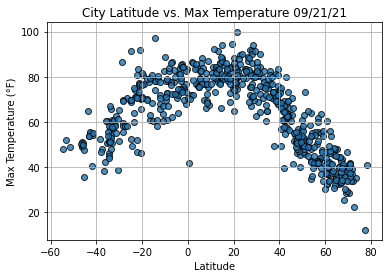

In [35]:
# Import matplotlib.
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolors = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

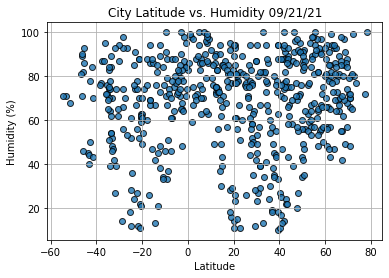

In [37]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolors = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

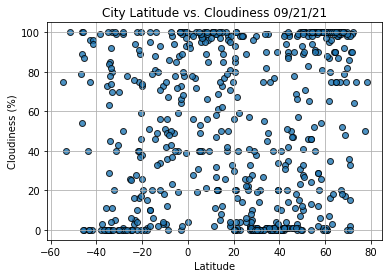

In [38]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolors = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

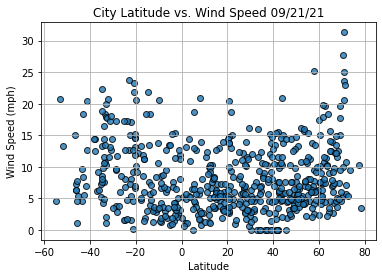

In [39]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolors = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()